# visualizing patches

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [139]:
patch_info=pd.read_pickle("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/270_A2f_ASAP_tumor_map.pkl")

In [140]:
#original numpy file
npy_file=np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/270_A2f_ASAP_tumor_map.npy")

In [141]:
print(patch_info)

                ID      x      y  patch_size annotation  y_true  inflamm  scc
0     270_A2f_ASAP   1024  10240         256          0       0        0    0
1     270_A2f_ASAP   1024  10496         256          0       0        0    0
2     270_A2f_ASAP   1024  10752         256          0       0        0    0
3     270_A2f_ASAP   1024  11008         256          0       0        0    0
4     270_A2f_ASAP   1024  11264         256          0       0        0    0
...            ...    ...    ...         ...        ...     ...      ...  ...
7415  270_A2f_ASAP  25600  39168         256          0       0        0    0
7416  270_A2f_ASAP  25600  39424         256          0       0        0    0
7417  270_A2f_ASAP  25856  38144         256          0       0        0    0
7418  270_A2f_ASAP  25856  38400         256          0       0        0    0
7419  270_A2f_ASAP  25856  38656         256          0       0        0    0

[7420 rows x 8 columns]


# extracting patch info for scc/ inflamm patches

In [241]:
#scc
patch_info['scc'].value_counts()
scc_patches_info=pd.DataFrame(patch_info.loc[patch_info.scc==1, :])

In [243]:
scc_patches_info

,ID,x,y,patch_size,annotation,y_true,inflamm,scc
3088,270_A2f_ASAP,9984,25856,256,0,2,0,1
3089,270_A2f_ASAP,9984,26112,256,0,2,0,1
3090,270_A2f_ASAP,9984,26368,256,0,2,0,1
3190,270_A2f_ASAP,10240,25344,256,0,2,0,1
3191,270_A2f_ASAP,10240,25600,256,0,2,0,1
...,...,...,...,...,...,...,...,...
6777,270_A2f_ASAP,21504,26624,256,0,2,0,1
6778,270_A2f_ASAP,21504,26880,256,0,2,0,1
6779,270_A2f_ASAP,21504,27136,256,0,2,0,1
7343,270_A2f_ASAP,24320,37632,256,0,2,0,1


In [245]:
#inflamm
patch_info['inflamm'].value_counts()
inflamm_patches_info=pd.DataFrame(patch_info.loc[patch_info.inflamm==1, :])

In [246]:
inflamm_patches_info

,ID,x,y,patch_size,annotation,y_true,inflamm,scc
706,270_A2f_ASAP,4096,5120,256,0,1,1,0
2978,270_A2f_ASAP,9728,23552,256,0,1,1,0
2979,270_A2f_ASAP,9728,23808,256,0,1,1,0
3070,270_A2f_ASAP,9984,21248,256,0,1,1,0
3071,270_A2f_ASAP,9984,21504,256,0,1,1,0
...,...,...,...,...,...,...,...,...
7236,270_A2f_ASAP,23296,38400,256,0,1,1,0
7269,270_A2f_ASAP,23552,37888,256,0,1,1,0
7270,270_A2f_ASAP,23552,38144,256,0,1,1,0
7271,270_A2f_ASAP,23552,38400,256,0,1,1,0


In [247]:
#actually visualizing now
patch_n=706#inflamm

patch_type=[scc_patches_info, inflamm_patches_info]

file_length=len(patch_info)
stackedarray=np.split(npy_file, file_length)
patch=stackedarray[patch_n]
np.shape(patch)
patch_reshaped=np.reshape(patch,(256,256,3))

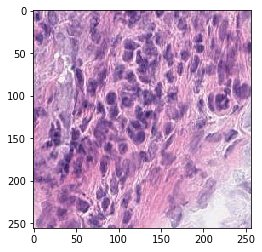

In [248]:
from matplotlib import pyplot as plt
plt.imshow(patch_reshaped, interpolation='nearest')

# dataset partitioning

In [16]:
#getting IDs
import tqdm, glob,os
path="/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2"
IDs=[]
for file in tqdm.tqdm(sorted(glob.glob(path + '/*.pkl'))):
    ID=os.path.basename(file).replace(path,'').replace('_ASAP_tumor_map.pkl','')
    IDs.append(ID)
    
IDs.sort()
print(IDs)

100%|███████████████████████████████████████| 95/95 [00:00<00:00, 229394.86it/s]

['109_A1c', '10_A1a', '10_A1b', '10_A2b', '110_A2b', '112_a', '112_b', '123_A1a', '12_A1c', '14_A1b', '14_A2b', '169_A2b', '270_A1b', '270_A1d', '270_A1e', '270_A2b', '270_A2f', '281_A1d', '281_A1f', '281_A2eX', '311_A2c', '327_A1a', '327_A1d', '327_B1c', '341_a', '341_b', '342_a', '342_b', '343_a', '343_b', '343_c', '343_d', '344_a', '344_b', '345_a', '345_b', '346_a', '346_b', '350_A1a', '350_A1b', '350_A1c', '350_A1d', '350_A1e', '351_A2b', '352_A1d', '352_A1e', '352_A1g', '352_A1h', '352_A1i', '353_A2b', '354_A1b', '354_A1c', '354_A1d', '354_A3a', '354_A3b', '354_A3c', '354_D1b', '355_A1d', '356_A1b', '358_A1a', '358_A1b', '361_a', '361_b', '362_A1a', '362_A1b', '362_A1c', '363_A1b', '363_A1c', '363_A2b', '363_A3b', '364_A1b', '364_A2b', '364_A4b', '365_A1b', '365_A2b', '366_A1a', '366_A1b', '366_A1c', '367_A2b', '368_A1b', '368_A1c', '368_A1d', '369_A1b', '369_A1c', '369_A2b', '370_A1b', '370_A2a', '370_A2b', '37_A2d', '61_A1a', '61_B1a', '70_A2b', '7_A1c', '7_A1d', '7_A1e']


In [30]:
patient_list=np.unique([os.path.basename(x).split("_")[0] for x in IDs])

In [249]:
#40 different patients
print(patient_list)
print(len(patient_list))

['109', '10', '10', '10', '110', '112', '112', '123', '12', '14', '14', '169', '270', '270', '270', '270', '270', '281', '281', '281', '311', '327', '327', '327', '341', '341', '342', '342', '343', '343', '343', '343', '344', '344', '345', '345', '346', '346', '350', '350', '350', '350', '350', '351', '352', '352', '352', '352', '352', '353', '354', '354', '354', '354', '354', '354', '354', '355', '356', '358', '358', '361', '361', '362', '362', '362', '363', '363', '363', '363', '364', '364', '364', '365', '365', '366', '366', '366', '367', '368', '368', '368', '369', '369', '369', '370', '370', '370', '37', '61', '61', '70', '7', '7', '7']
95


In [17]:
import tqdm, glob
npy_path="/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info"
npy=[]
for file in tqdm.tqdm(sorted(glob.glob(npy_path + '/*.npy'))):
    npy_file=file
    npy.append(npy_file)

npy.sort()
print(npy)

100%|███████████████████████████████████████| 95/95 [00:00<00:00, 480650.04it/s]

['/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/109_A1c_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A1a_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A1b_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A2b_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/110_A2b_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/112_a_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/112_b_ASAP_tumor_map.npy', '/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_da

In [18]:
for x in range(len(npy)):
    print(npy[x])

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/109_A1c_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A1a_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A1b_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/10_A2b_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/110_A2b_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/112_a_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/112_b_ASAP_tumor_map.npy
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info/12

In [34]:
import tqdm, glob
pkl_path="/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2"
pkl=[]
for file in tqdm.tqdm(sorted(glob.glob(pkl_path + '/*.pkl'))):
    pkl_file=file
    pkl.append(pkl_file)

for x in range(len(pkl)):
    print(pkl[x])

100%|███████████████████████████████████████| 95/95 [00:00<00:00, 398857.74it/s]

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/109_A1c_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/10_A1a_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/10_A1b_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/10_A2b_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/110_A2b_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/112_a_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data/prelim_patch_info_v2/112_b_ASAP_tumor_map.pkl
/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/scc_tumor_data

In [66]:
patient_list=[]
for x in IDs:
    patient=os.path.basename(x).split("_")[0]
    patient_list.append(patient)

In [70]:
file_info = pd.DataFrame(columns=["IDs", "patient", "patch_info_loc", "npy_loc", "set"])

In [72]:
file_info["IDs"]=IDs
file_info["patch_info_loc"]=pkl
file_info["npy_loc"]=npy
file_info["patient"]=patient_list

In [97]:
file_info

,IDs,patient,patch_info_loc,npy_loc,set
0,109_A1c,109,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
1,10_A1a,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
2,10_A1b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
3,10_A2b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
4,110_A2b,110,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
...,...,...,...,...,...
90,61_B1a,61,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
91,70_A2b,70,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
92,7_A1c,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
93,7_A1d,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train


# splitting

In [170]:
from sklearn.model_selection import GroupShuffleSplit
#split 1
train_idx, test_idx=next(GroupShuffleSplit(random_state=42,test_size=0.2,train_size=0.8).split(file_info, groups=file_info['patient']))

In [171]:
#separate training data for split 2 bc GroupShuffleSplit unfortunately can't do train/test/val splits
train_data=pd.DataFrame(file_info[file_info.set=='train'])

In [172]:
train_data

,IDs,patient,patch_info_loc,npy_loc,set
0,109_A1c,109,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
1,10_A1a,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
2,10_A1b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
3,10_A2b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
4,110_A2b,110,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
...,...,...,...,...,...
88,37_A2d,37,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
91,70_A2b,70,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
92,7_A1c,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
93,7_A1d,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train


In [173]:
#split2
train_idx, val_idx=next(GroupShuffleSplit(random_state=42,test_size=0.125,train_size=0.875).split(train_data, groups=train_data['patient']))

In [178]:
file_info['set']='train'
file_info.loc[test_idx,'set']='test'

In [180]:
# test_idx, doesn't need to be changed
print(test_idx)
print(len(test_idx))

[ 8 24 25 32 33 34 35 43 61 62 63 64 65 89 90]
15


In [175]:
#old val_idx b4 I re-index it
print(val_idx)
print(len(val_idx))

[36 37 38 39 40 42 43 44 45 46 47 48 62 63 64 72 73 74]
18


In [184]:
#doing it the dumb way(aka, MANUALLY) bc i haven't thought of an other way yet... yay...
for x in val_idx:
    print (train_data.iloc[x])

IDs                                                         352_A1d
patient                                                         352
patch_info_loc    /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...
npy_loc           /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...
set                                                           train
Name: 44, dtype: object
IDs                                                         352_A1e
patient                                                         352
patch_info_loc    /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...
npy_loc           /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...
set                                                           train
Name: 45, dtype: object
IDs                                                         352_A1g
patient                                                         352
patch_info_loc    /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...
npy_loc           /dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...


In [214]:
#finding indexes
file_info[file_info.IDs=='370_A2b']

,IDs,patient,patch_info_loc,npy_loc,set,"(44, set)","(45, set)","(46, set)"
87,370_A2b,370,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train,val,val,val


In [215]:
#val_idx after being indexed
val_idx=[44,45,46,47,48,50,51,52,53,54,55,56,75,76,77,85,86,87]

In [229]:
file_info

,IDs,patient,patch_info_loc,npy_loc,set
0,109_A1c,109,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
1,10_A1a,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
2,10_A1b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
3,10_A2b,10,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
4,110_A2b,110,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
...,...,...,...,...,...
90,61_B1a,61,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,test
91,70_A2b,70,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
92,7_A1c,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train
93,7_A1d,7,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,train


In [228]:
file_info[file_info.set=='val']

,IDs,patient,patch_info_loc,npy_loc,set
44,352_A1d,352,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
45,352_A1e,352,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
46,352_A1g,352,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
47,352_A1h,352,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
48,352_A1i,352,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
50,354_A1b,354,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
51,354_A1c,354,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
52,354_A1d,354,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
53,354_A3a,354,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val
54,354_A3b,354,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Stud...,val


In [230]:
pd.crosstab(file_info['set'],file_info['patient'])

patient,10,109,110,112,12,123,14,169,270,281,...,365,366,367,368,369,37,370,61,7,70
set,,,,,,,,,,,,,,,,,,,,,
test,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
train,3,1,1,2,0,1,2,1,5,3,...,2,0,1,3,3,1,0,0,3,1
val,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,3,0,0,0


In [231]:
file_info.to_pickle('file_info.pkl')

In [232]:
! mv "/dartfs-hpc/rc/home/3/f006n33/file_info.pkl" "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Sophie_Chen/"